## MLP

X shape: (200, 2), y shape: (200, 1)
Epoch 0, Loss: 1.336317406751829
Epoch 1000, Loss: 0.9275263569269144
Epoch 2000, Loss: 0.7874667400689432
Epoch 3000, Loss: 0.7472737455696317
Epoch 4000, Loss: 0.7334926803258368
Epoch 5000, Loss: 0.7264103377818978
Epoch 6000, Loss: 0.721344915963929
Epoch 7000, Loss: 0.7171707031487772
Epoch 8000, Loss: 0.7135772610842118
Epoch 9000, Loss: 0.7104448067853179
Epoch 10000, Loss: 0.7077030440170226
Epoch 11000, Loss: 0.7052987531743741
Epoch 12000, Loss: 0.7031877303945256
Epoch 13000, Loss: 0.7013322350039577
Epoch 14000, Loss: 0.6996997642056261
Epoch 15000, Loss: 0.6982622218548942
Epoch 16000, Loss: 0.6969952622490413
Epoch 17000, Loss: 0.6958777470350556
Epoch 18000, Loss: 0.694891289347129
Epoch 19000, Loss: 0.6940198690333972
Accuracy: 46.666666666666664%


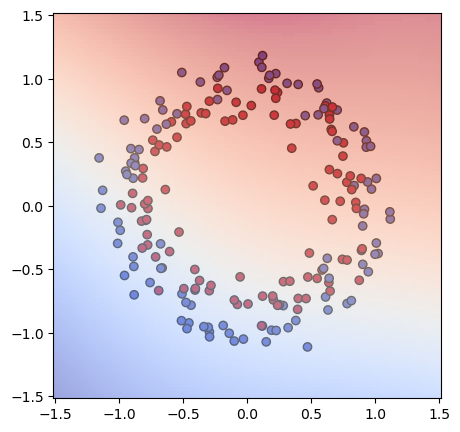

In [1]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Set hyperparameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.init_parameters()

    def init_parameters(self):
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def activation(self, a):
        denom = 1 + np.exp(-a)
        return 1 / denom

    def activation_derivative(self, a):
        ### YOUR CODE STARTS HERE ###
        #Sigmoid function derivative
        return a * (1-a)
        ### YOUR CODE ENDS HERE ###

    def forward_propagation(self, X):
        self.a1 = X @ self.W1 + self.b1
        self.z1 = self.activation(self.a1)
        # Input for output layer
        self.a2 = self.z1 @ self.W2 + self.b2
        # Activation function for output
        self.z2 = self.activation(self.a2)
        
        return self.z2

    def binary_cross_entropy_loss(self, y, out):
        return -np.mean(y * np.log(out) + (1 - y) * np.log(1 - out))

    def binary_cross_entropy_derivative(self, y, out):
        ### YOUR CODE STARTS HERE ###
        epsilon = 1e-10
        return (out - y) / ((out * (1 - out)) + epsilon)
        ### YOUR CODE ENDS HERE ###

    def backward_propagation(self, X, y, out):
        # ∇L_out
        grad_out = self.binary_cross_entropy_derivative(y, out)

        # ∇L_a2
        grad_a2 = grad_out * self.activation_derivative(out)

        # ∇L_z1
        grad_z1 = grad_a2 @ self.W2.T

        # ∇L_a1
        grad_a1 = grad_z1 * self.activation_derivative(self.z1)

        # Gradient of weights and biases
        ### YOUR CODE STARTS HERE ###
        m = X.shape[0]  # Number of samples
        grad_W2 = self.z1.T @ grad_a2 / m
        grad_b2 = np.sum(grad_a2, axis=0, keepdims=True) / m
        grad_W1 = X.T @ grad_a1 / m
        grad_b1 = np.sum(grad_a1, axis=0, keepdims=True) / m
        ### YOUR CODE ENDS HERE ###

        self.update_weights(grad_W2, grad_b2, grad_W1, grad_b1)

    def update_weights(self, grad_W2, grad_b2, grad_W1, grad_b1):
        # Update weights and biases using gradient descent
        ### YOUR CODE STARTS HERE ###
        self.W2 -= self.learning_rate * grad_W2
        self.b2 -= self.learning_rate * grad_b2
        self.W1 -= self.learning_rate * grad_W1
        self.b1 -= self.learning_rate * grad_b1
        ### YOUR CODE ENDS HERE ###

    def fit(self, X, y, epochs=10000):
        # Train the model for some epochs
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            self.backward_propagation(X, y, output)
            if epoch % 1000 == 0:
                loss = self.binary_cross_entropy_loss(y, output)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        # Get the predicted classes
        output = self.forward_propagation(X)
        return np.round(output)

    def test(self, X, y):
        # Evaluate the model on test data
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        print(f"Accuracy: {accuracy * 100}%")


if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.datasets import make_circles
    from sklearn.model_selection import train_test_split

    # Generate a dataset
    X, y = make_circles(200, noise=0.1, random_state=42)
    y = y[:, np.newaxis]
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Initialize and train the MLP
    mlp = MLP(input_size=2, hidden_size=8, output_size=1, learning_rate=0.001)
    mlp.fit(X_train, y_train, epochs=20000)

    # Test the MLP
    mlp.test(X_test, y_test)

    plt.figure(figsize=(5, 5))
    # Scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), ec="black", cmap="coolwarm")

    # Decision surface of the model
    xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    out = mlp.forward_propagation(X_grid)
    plt.pcolormesh(xx, yy, out.reshape(xx.shape), cmap="coolwarm", alpha=0.5)
    plt.show()